In [144]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

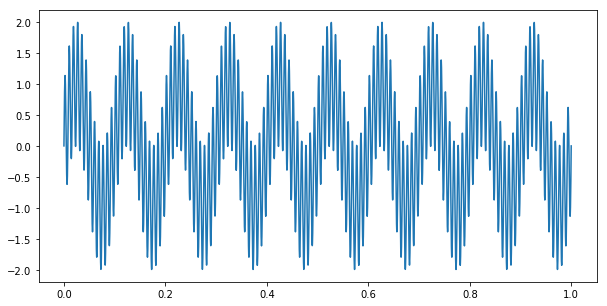

In [145]:
t = np.linspace(0, 1, 4096)
x1 = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*120*t)
plt.figure(figsize = (10, 5))
plt.plot(t, x1)

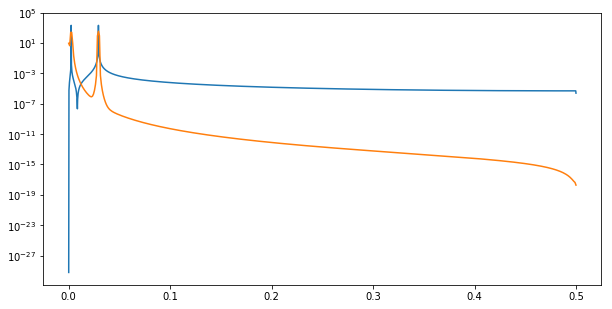

In [146]:
pd1, pdden1 = signal.periodogram(x1)
pdw1, pddenw1 = signal.welch(x1, nperseg = 1024)
plt.figure(figsize = (10, 5))
plt.semilogy(pd1, pdden1)
plt.semilogy(pdw1, pddenw1)

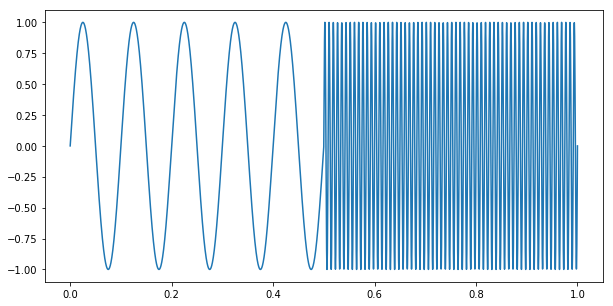

In [147]:
t = np.linspace(0, 1, 4096)
x2 = np.zeros(4096)
for i in range(0, len(t)//2):
    x2[i] = np.sin(2*np.pi*10*t[i])
for i in range(len(t)//2, len(t)):
    x2[i] = np.sin(2*np.pi*120*t[i])
plt.figure(figsize = (10, 5))
plt.plot(t, x2)

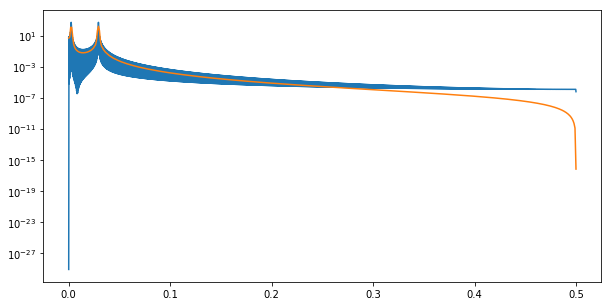

In [148]:
pd2, pdden2 = signal.periodogram(x2)
pdw2, pddenw2 = signal.welch(x2, nperseg = 1024)
plt.figure(figsize = (10, 5))
plt.semilogy(pd2, pdden2)
plt.semilogy(pdw2, pddenw2)

In [149]:
fs = 1/(t[1]-t[0]) # fs = 1/dt = N/T

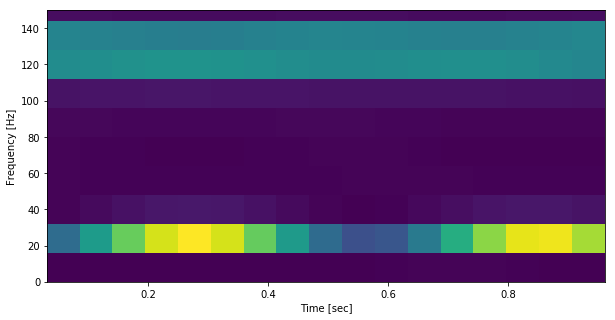

In [150]:
f, tx, Sxx = signal.spectrogram(x1, fs) # возвращаем частоту от времени
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx) # цвет – интенсивность спектрограммы
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


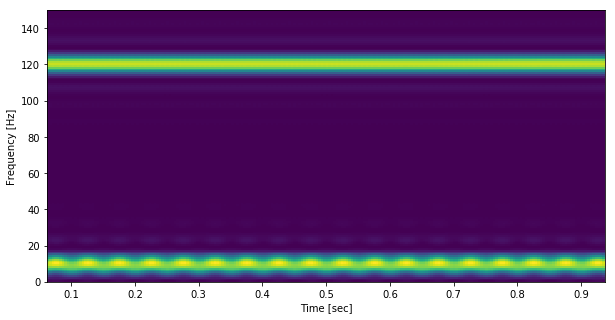

In [151]:
f, tx, Sxx = signal.spectrogram(x1, fs, nperseg = 512, noverlap = 496, nfft=4096)
# длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT = 4096
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


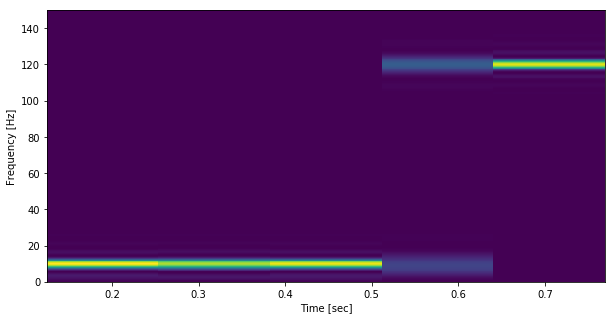

In [152]:
f, tx, Sxx = signal.spectrogram(x2, fs, nperseg = 1024, noverlap = 496, nfft=8192 )
# 
plt.figure(figsize = (10, 5))
plt.pcolormesh(tx, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) # строим до 150 Гц, иначе будет до fs/2
plt.xlabel('Time [sec]')
plt.show()

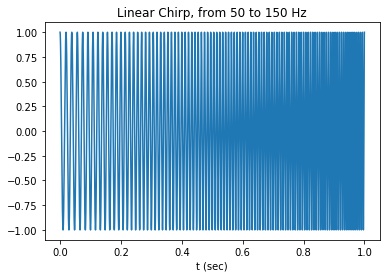

In [153]:
tx = np.linspace(0, 1, 8192) # временной отрезок от 0 до 1 сек
w = signal.chirp(tx, f0=50, f1=150, t1=1, method='linear')
# от 50 до 150 Гц за 1 секунду, ЛЧМ
plt.plot(tx, w)
plt.title("Linear Chirp, from 50 to 150 Hz")
plt.xlabel('t (sec)')
plt.show()

In [154]:
fs = 1/(tx[1]-tx[0]) # fs = 1/dt = N/T

C:\ProgramData\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


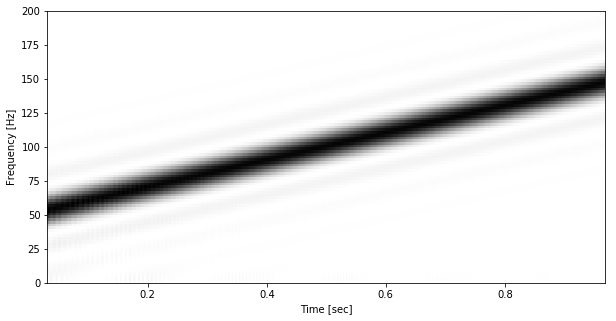

In [155]:
f, t, Sxx = signal.spectrogram(w, fs, nperseg = 512, noverlap = 496, nfft=4096)
# длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT = 4096
plt.figure(figsize = (10, 5))
plt.pcolormesh(t, f, Sxx, cmap='gray_r') # в оттенках серого цвета
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 200)
plt.xlabel('Time [sec]')
plt.show()

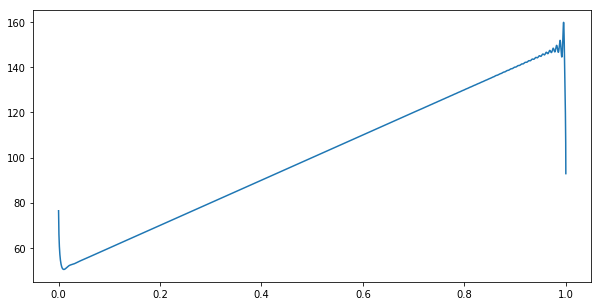

In [156]:
analytic_signal = signal.hilbert(w) # аналитический сигнал
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
# мгновенная фаза в развернутом непрерывном виде
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)
# мгновенная частота как производная от фазы, приведенная в Гц
plt.figure(figsize = (10, 5))
# из-за численного расчета производной массив мгновенной частоты
#будет меньше массива времени на одну точку:
plt.plot(tx[1:], instantaneous_frequency)
plt.show()

In [157]:
#20
tx = np.linspace(0, 1, 8192) # ЛЧМ в большем диапазоне
w = signal.chirp(tx, f0=200, f1=3000, t1=1, method='linear')

In [158]:
fs = 1/(tx[1]-tx[0])


C:\ProgramData\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


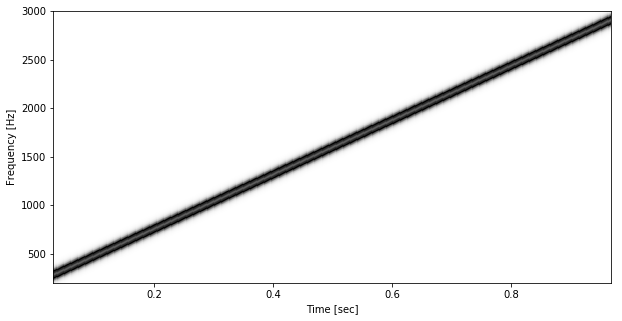

In [159]:
f, t, Sxx = signal.spectrogram(w, fs, nperseg = 512, noverlap = 496, nfft=4096)
# длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT = 4096
plt.figure(figsize = (10, 5))
plt.pcolormesh(t, f, Sxx, cmap='gray_r') # в оттенках серого цвета
plt.ylabel('Frequency [Hz]')
plt.ylim(200, 3000)
plt.xlabel('Time [sec]')
plt.show()

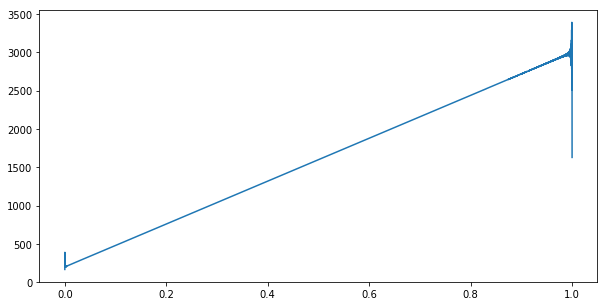

In [160]:
analytic_signal = signal.hilbert(w) # аналитический сигнал
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
# мгновенная фаза в развернутом непрерывном виде
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)
# мгновенная частота как производная от фазы, приведенная в Гц
plt.figure(figsize = (10, 5))
# из-за численного расчета производной массив мгновенной частоты
#будет меньше массива времени на одну точку:
plt.plot(tx[1:], instantaneous_frequency)
plt.show()

In [188]:
#21
tx = np.linspace(0, 1, 8192)
w = signal.chirp(tx, f0=2000, f1=200, t1=1, method='quadratic')

C:\ProgramData\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


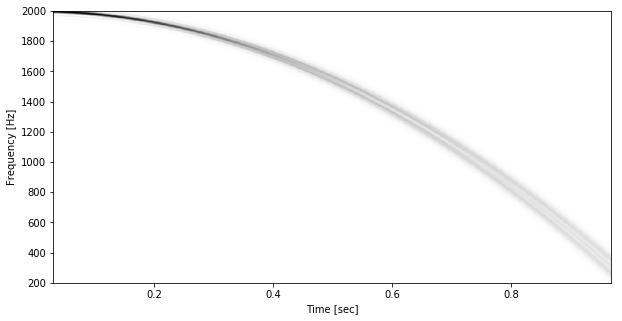

In [192]:
f, t, Sxx = signal.spectrogram(w, fs, nperseg = 512, noverlap = 496, nfft=4096)
# длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT = 4096
plt.figure(figsize = (10, 5))
plt.pcolormesh(t, f, Sxx, cmap='gray_r') # в оттенках серого цвета
plt.ylabel('Frequency [Hz]')
plt.ylim(200, 2000)
plt.xlabel('Time [sec]')
plt.show()

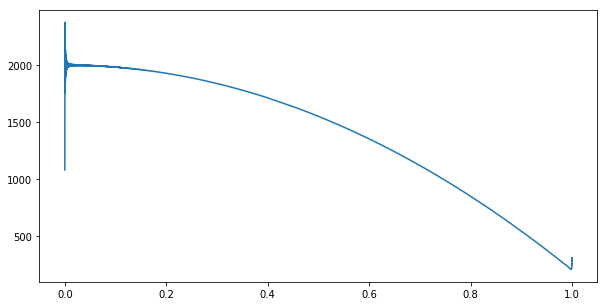

In [193]:
analytic_signal = signal.hilbert(w) # аналитический сигнал
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
# мгновенная фаза в развернутом непрерывном виде
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)
# мгновенная частота как производная от фазы, приведенная в Гц
plt.figure(figsize = (10, 5))
# из-за численного расчета производной массив мгновенной частоты
#будет меньше массива времени на одну точку:
plt.plot(tx[1:], instantaneous_frequency)
plt.show()

In [194]:
tx = np.linspace(0, 1, 8192)
w = signal.chirp(tx, f0=3200, f1=400, t1=1, method='quadratic', vertex_zero=False)

C:\ProgramData\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


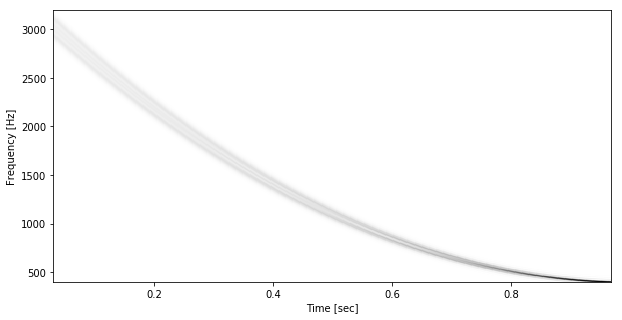

In [195]:
f, t, Sxx = signal.spectrogram(w, fs, nperseg = 512, noverlap = 496, nfft=4096)
# длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT = 4096
plt.figure(figsize = (10, 5))
plt.pcolormesh(t, f, Sxx, cmap='gray_r') # в оттенках серого цвета
plt.ylabel('Frequency [Hz]')
plt.ylim(400, 3200)
plt.xlabel('Time [sec]')
plt.show()

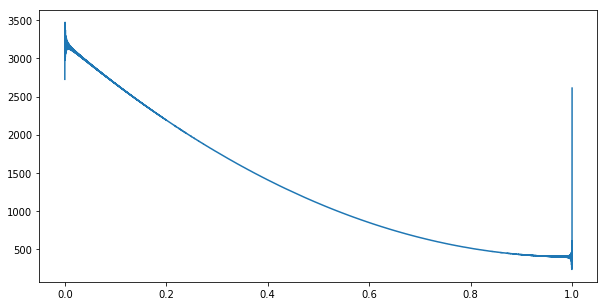

In [196]:
analytic_signal = signal.hilbert(w) # аналитический сигнал
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
# мгновенная фаза в развернутом непрерывном виде
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)
# мгновенная частота как производная от фазы, приведенная в Гц
plt.figure(figsize = (10, 5))
# из-за численного расчета производной массив мгновенной частоты
#будет меньше массива времени на одну точку:
plt.plot(tx[1:], instantaneous_frequency)
plt.show()

In [197]:
#22
tx = np.linspace(0, 1, 8192)
w = signal.chirp(tx, f0=2450, f1=300, t1=1, method='logarithmic')

C:\ProgramData\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


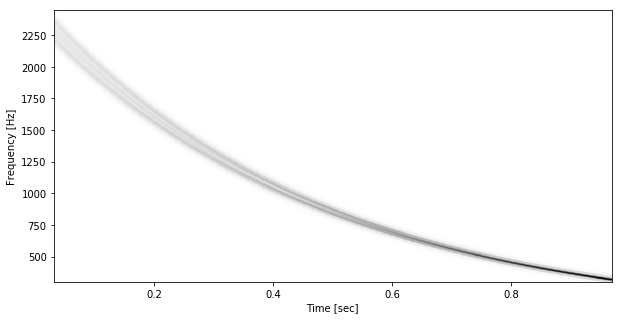

In [201]:
f, t, Sxx = signal.spectrogram(w, fs, nperseg = 512, noverlap = 496, nfft=4096)
# длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT = 4096
plt.figure(figsize = (10, 5))
plt.pcolormesh(t, f, Sxx, cmap='gray_r') # в оттенках серого цвета
plt.ylabel('Frequency [Hz]')
plt.ylim(300,2450 )
plt.xlabel('Time [sec]')
plt.show()

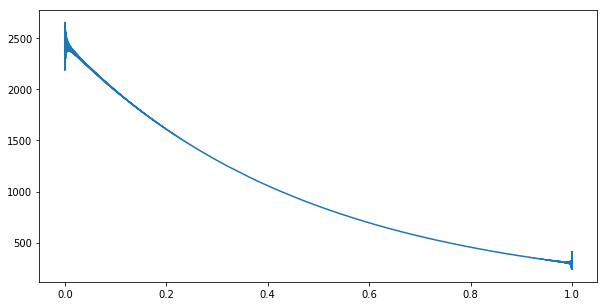

In [202]:
analytic_signal = signal.hilbert(w) # аналитический сигнал
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
# мгновенная фаза в развернутом непрерывном виде
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)
# мгновенная частота как производная от фазы, приведенная в Гц
plt.figure(figsize = (10, 5))
# из-за численного расчета производной массив мгновенной частоты
#будет меньше массива времени на одну точку:
plt.plot(tx[1:], instantaneous_frequency)
plt.show()

In [203]:
#23
tx = np.linspace(0, 1, 8192)
w = signal.chirp(tx, f0=1500, f1=250, t1=1, method='hyperbolic')

C:\ProgramData\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


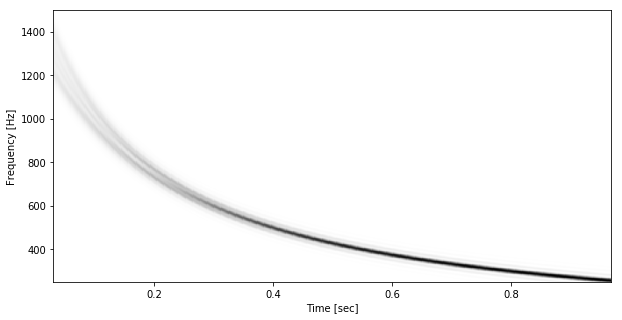

In [205]:
f, t, Sxx = signal.spectrogram(w, fs, nperseg = 512, noverlap = 496, nfft=4096)
# длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT = 4096
plt.figure(figsize = (10, 5))
plt.pcolormesh(t, f, Sxx, cmap='gray_r') # в оттенках серого цвета
plt.ylabel('Frequency [Hz]')
plt.ylim(250, 1500)
plt.xlabel('Time [sec]')
plt.show()

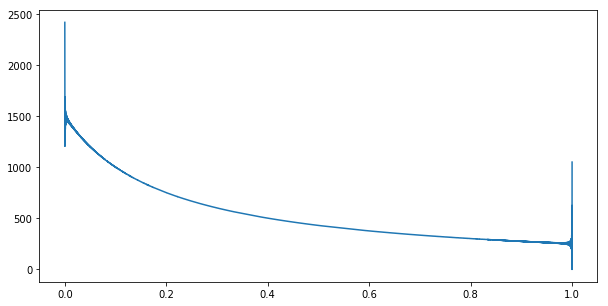

In [206]:
analytic_signal = signal.hilbert(w) # аналитический сигнал
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
# мгновенная фаза в развернутом непрерывном виде
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)
# мгновенная частота как производная от фазы, приведенная в Гц
plt.figure(figsize = (10, 5))
# из-за численного расчета производной массив мгновенной частоты
#будет меньше массива времени на одну точку:
plt.plot(tx[1:], instantaneous_frequency)
plt.show()

In [207]:
#24
tx = np.linspace(0, 10, 8192)
p = np.poly1d([2.5, -36.0, 125.0, 150.0])
w = signal.sweep_poly(tx, p)

C:\ProgramData\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


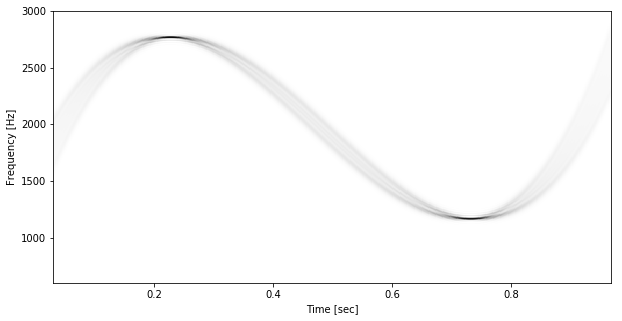

In [209]:
f, t, Sxx = signal.spectrogram(w, fs, nperseg = 512, noverlap = 496, nfft=4096)
# длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT = 4096
plt.figure(figsize = (10, 5))
plt.pcolormesh(t, f, Sxx, cmap='gray_r') # в оттенках серого цвета
plt.ylabel('Frequency [Hz]')
plt.ylim(600, 3000)
plt.xlabel('Time [sec]')
plt.show()

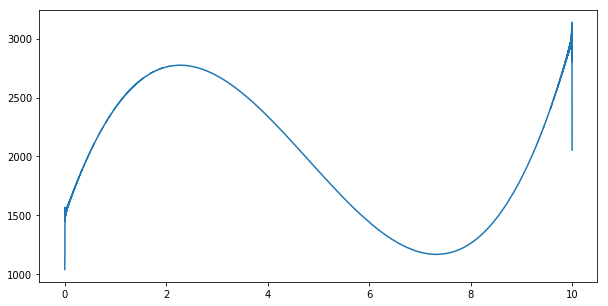

In [172]:
analytic_signal = signal.hilbert(w) # аналитический сигнал
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
# мгновенная фаза в развернутом непрерывном виде
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)
# мгновенная частота как производная от фазы, приведенная в Гц
plt.figure(figsize = (10, 5))
# из-за численного расчета производной массив мгновенной частоты
#будет меньше массива времени на одну точку:
plt.plot(tx[1:], instantaneous_frequency)
plt.show()

In [211]:
tx = np.linspace(0, 10, 2*8192)
mod = 500*np.cos(2*np.pi*0.25*tx)
w = 2 * np.sqrt(2) * np.sin(2*np.pi*300*tx + mod)

C:\ProgramData\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


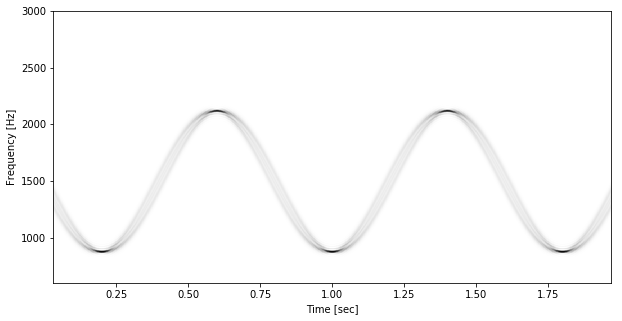

In [214]:
f, t, Sxx = signal.spectrogram(w, fs, nperseg = 512, noverlap = 496, nfft=4096)
# длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT = 4096
plt.figure(figsize = (10, 5))
plt.pcolormesh(t, f, Sxx, cmap='gray_r') # в оттенках серого цвета
plt.ylabel('Frequency [Hz]')
plt.ylim(600, 3000)
plt.xlabel('Time [sec]')
plt.show()

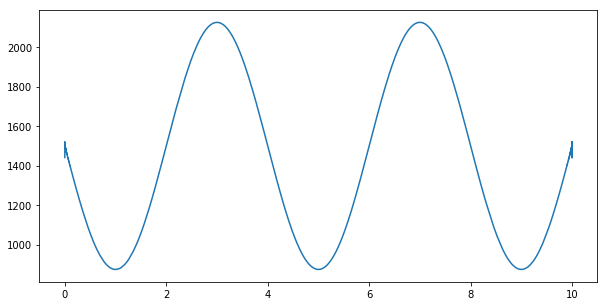

In [215]:
analytic_signal = signal.hilbert(w) # аналитический сигнал
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
# мгновенная фаза в развернутом непрерывном виде
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)
# мгновенная частота как производная от фазы, приведенная в Гц
plt.figure(figsize = (10, 5))
# из-за численного расчета производной массив мгновенной частоты
#будет меньше массива времени на одну точку:
plt.plot(tx[1:], instantaneous_frequency)
plt.show()

In [227]:
tx = np.linspace(0, 10, 2*8192)
f1=10
f2=20
f3=30
f4=40
w = np.sin(2*np.pi*f1*tx) + np.sin(2*np.pi*f2*tx) + np.sin(2*np.pi*f3*tx) + np.sin(2*np.pi*f4*tx)

C:\ProgramData\Anaconda3\lib\site-packages\mkl_fft\_numpy_fft.py:331: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfft_numpy(a, n=n, axis=axis)


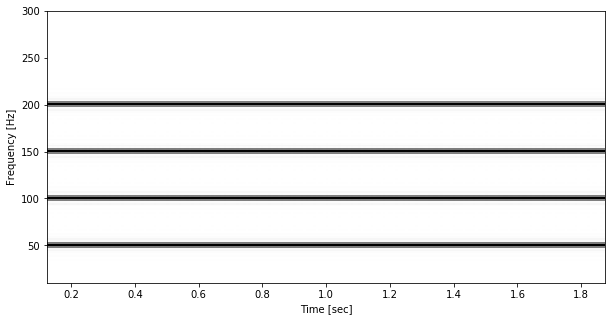

In [231]:
f, t, Sxx = signal.spectrogram(w, fs, nperseg = 4*512, noverlap = 4*496, nfft=4096)
# длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT = 4096
plt.figure(figsize = (10, 5))
plt.pcolormesh(t, f, Sxx, cmap='gray_r') # в оттенках серого цвета
plt.ylabel('Frequency [Hz]')
plt.ylim(10, 300)
plt.xlabel('Time [sec]')
plt.show()

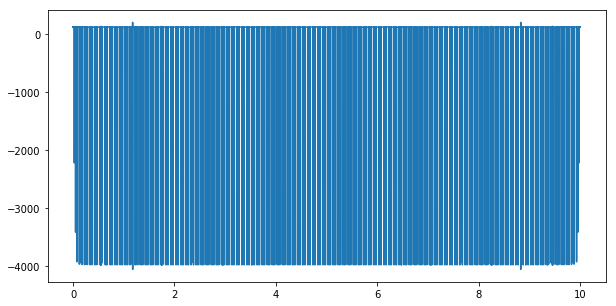

In [218]:
analytic_signal = signal.hilbert(w) # аналитический сигнал
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
# мгновенная фаза в развернутом непрерывном виде
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)
# мгновенная частота как производная от фазы, приведенная в Гц
plt.figure(figsize = (10, 5))
# из-за численного расчета производной массив мгновенной частоты
#будет меньше массива времени на одну точку:
plt.plot(tx[1:], instantaneous_frequency)
plt.show()

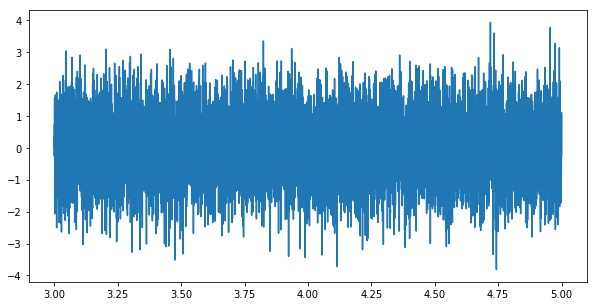

In [219]:
x = rand.randn(10000)
t = np.linspace(3, 5, num = 10000)
plt.figure(figsize = (10, 5))
plt.plot(t, x)
plt.show()

In [220]:
tsa.kpss(x)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


(0.3012534670079196,
 0.1,
 38,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

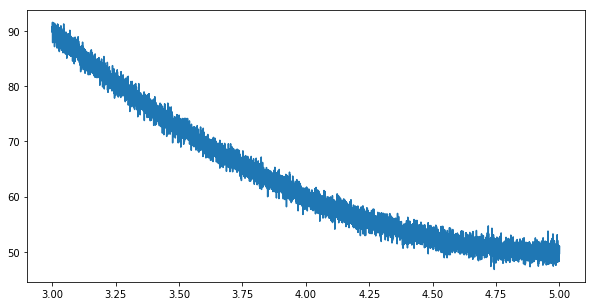

In [221]:
xv=x+(10*t**2-100*t+300)
plt.figure(figsize = (10, 5))
plt.plot(t, xv)
plt.show()

In [222]:
tsa.kpss(xv)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


(24.524460822637444,
 0.01,
 38,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [223]:
stats.f_oneway(x[np.size(x) // 2:], x[:np.size(x) // 2])

F_onewayResult(statistic=2.533994529207899, pvalue=0.111449454166157)

In [224]:
stats.f_oneway(xv[np.size(xv) // 2:], xv[:np.size(xv) // 2])

F_onewayResult(statistic=23186.27166220296, pvalue=0.0)

In [225]:
stats.ttest_ind(x[np.size(x) // 2:], x[:np.size(x) // 2])

Ttest_indResult(statistic=-1.591852546314482, pvalue=0.11144945416600814)

In [226]:
stats.ttest_ind(xv[np.size(xv) // 2:], xv[:np.size(xv) // 2])

Ttest_indResult(statistic=-152.27038997192776, pvalue=0.0)